Literate Programming is one of my favourite concepts,
it fits beautifuly into scientific research.

It allows for "friendly" code that removes the need for formal
documentation and allows for more relaxed, human-readable code.


Here we can state all of the libraries that we use

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Now ,I'm fussy so I like to use seaborn for all styling

In [2]:
sns.set()

Next we want to load up the iris data set and have a look at the data.
Specifically a few random rows, so we know what we're working with! 

In [3]:
iris = sns.load_dataset("iris")
iris.sample(frac=0.1)

     sepal_length  sepal_width  petal_length  petal_width     species
2             4.7          3.2           1.3          0.2      setosa
123           6.3          2.7           4.9          1.8   virginica
32            5.2          4.1           1.5          0.1      setosa
17            5.1          3.5           1.4          0.3      setosa
90            5.5          2.6           4.4          1.2  versicolor
81            5.5          2.4           3.7          1.0  versicolor
145           6.7          3.0           5.2          2.3   virginica
136           6.3          3.4           5.6          2.4   virginica
106           4.9          2.5           4.5          1.7   virginica
118           7.7          2.6           6.9          2.3   virginica
14            5.8          4.0           1.2          0.2      setosa
122           7.7          2.8           6.7          2.0   virginica
96            5.7          2.9           4.2          1.3  versicolor
42            4.4   

Now we can have a look at the distribution of the data;
for example the "sepal_length" column and how the distributions compare across species

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8aea407b8>,
      dtype=object)

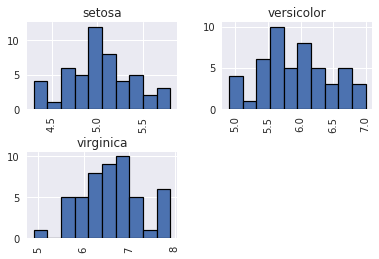

In [4]:
iris.hist(by="species", column="sepal_length",
          edgecolor='black', linewidth=1.2)

Before we can start testing these groups for statistical differences, we need to
check if the data are normal first - scipy provides a function for this

(We're only looking at setosa and versicolor for this example)

In [5]:
setosa_sw = iris[iris["species"] == "setosa"]["sepal_length"]
versicolor_sw = iris[iris["species"] == "versicolor"]["sepal_length"]

k1, p1 = stats.normaltest(setosa_sw)
k2, p2 = stats.normaltest(versicolor_sw)

print("setosa_sw is normal {0:.2f}\nversicolor_sw is normal {1:.2f}".format(p1,p2))

setosa_sw is normal 0.91
versicolor_sw is normal 0.66


Finally a student's ttest can be used, with assumed normality, to check if these two groups
are statistically different. 

In [6]:
t, p = stats.ttest_ind(setosa_sw, versicolor_sw)
print("A t-test for Setosa_sw and Versicolor_sw gives a p-value = {0}".format(p))

A t-test for Setosa_sw and Versicolor_sw gives a p-value = 8.985235037487079e-18


This allows us to reject the null-hypothesis, that these two groups are similar